In [4]:
# 1. Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Jupyter magic command to display plots inline
%matplotlib inline

# 2. Load the dataset
df = pd.read_csv("zomato.csv", encoding='latin-1')
print("Initial shape of dataset:", df.shape)
df.head()


Initial shape of dataset: (51717, 17)


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
# 3. Data Cleaning

# Dropping unnecessary columns
df.drop(['url', 'address', 'phone', 'dish_liked', 'reviews_list', 'menu_item'], axis=1, inplace=True, errors='ignore')

# Rename columns for easier access
df.rename(columns={
    'approx_cost(for two people)': 'cost',
    'listed_in(type)': 'restaurant_type',
    'listed_in(city)': 'city',
    'rate': 'rating',
    'name': 'restaurant_name'
}, inplace=True)

# Dropingp duplicate rows
df.drop_duplicates(inplace=True)

# Dropping rows with missing values in key columns
df.dropna(subset=['restaurant_name', 'location', 'rating', 'cost'], inplace=True)

# Cleaning 'rating' column (remove NEW, '-', etc.)
df['rating'] = df['rating'].replace(['NEW', '-', 'nan'], np.nan)
df['rating'] = df['rating'].astype(str).str.split('/').str[0]
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Cleaning 'cost' column (remove commas and convert to numeric)
df['cost'] = df['cost'].astype(str).str.replace(',', '')
df['cost'] = pd.to_numeric(df['cost'], errors='coerce')

# Dropping remaining nulls after cleanup
df.dropna(inplace=True)

# 4. Create cost categories (optional)
def cost_category(x):
    if x < 300:
        return '< ₹300'
    elif x < 600:
        return '₹300–600'
    elif x < 900:
        return '₹600–900'
    else:
        return '> ₹900'

df['cost_category'] = df['cost'].apply(cost_category)


In [6]:
# 5. KPI Summary
print("Total unique restaurants:", df['restaurant_name'].nunique())
print("Average rating:", round(df['rating'].mean(), 2))
print("Total votes:", df['votes'].sum())


Total unique restaurants: 6602
Average rating: 3.7
Total votes: 14501628


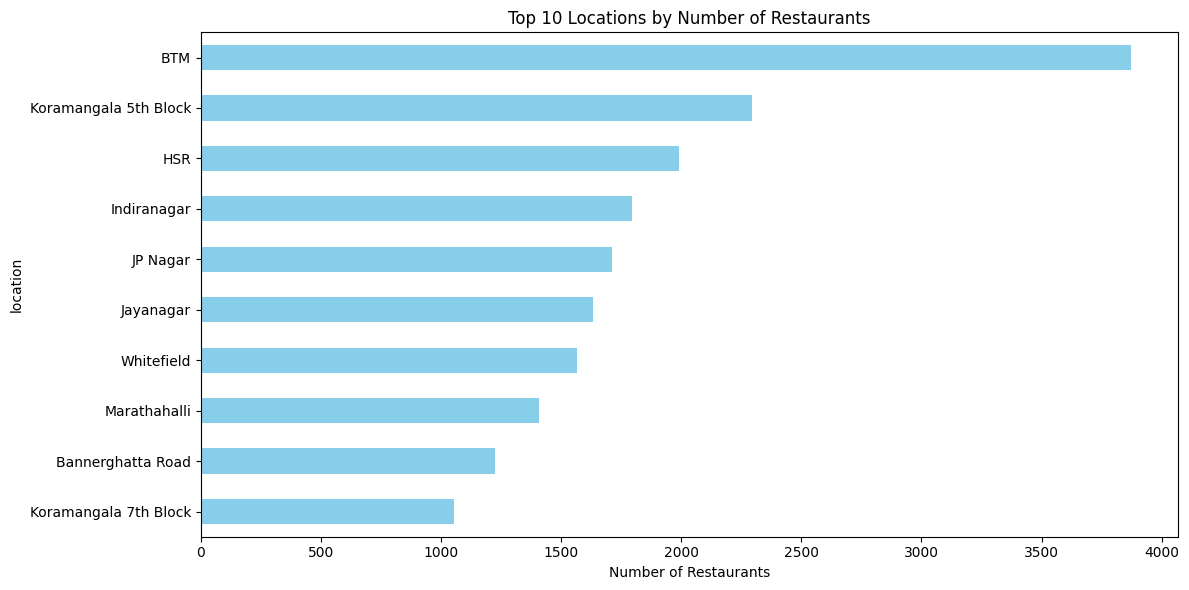

In [7]:
# 6. Top 10 Locations by Number of Restaurants
plt.figure(figsize=(12,6))
df['location'].value_counts().head(10).plot(kind='barh', color='skyblue')
plt.title("Top 10 Locations by Number of Restaurants")
plt.xlabel("Number of Restaurants")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


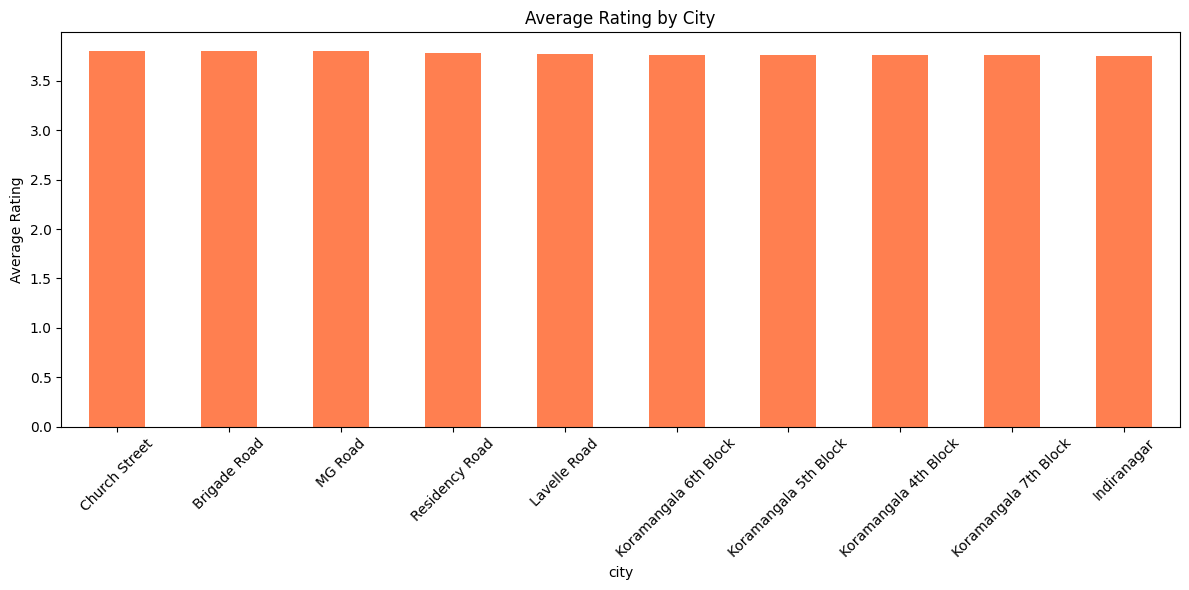

In [8]:
# 7. Average Rating by City
plt.figure(figsize=(12,6))
df.groupby('city')['rating'].mean().sort_values(ascending=False).head(10).plot(kind='bar', color='coral')
plt.title("Average Rating by City")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


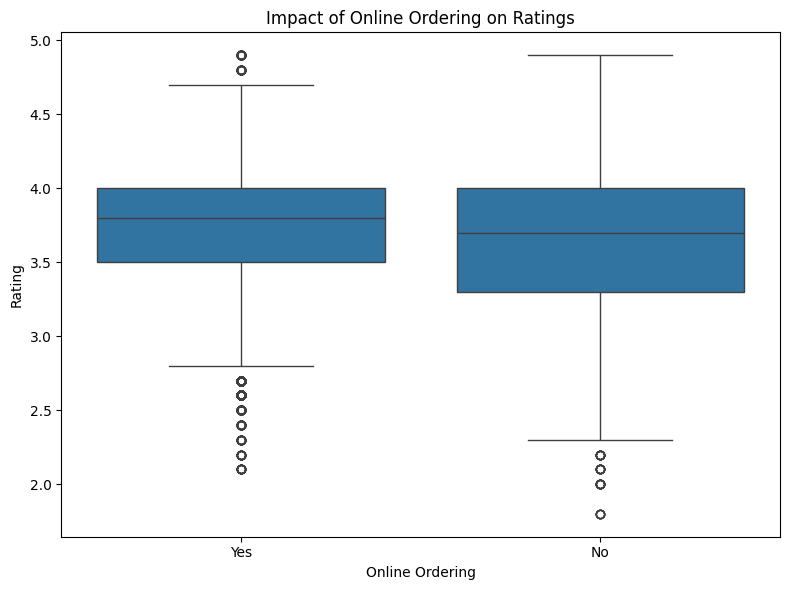

In [9]:
# 8. Impact of Online Ordering on Ratings
plt.figure(figsize=(8,6))
sns.boxplot(x='online_order', y='rating', data=df)
plt.title("Impact of Online Ordering on Ratings")
plt.xlabel("Online Ordering")
plt.ylabel("Rating")
plt.tight_layout()
plt.show()


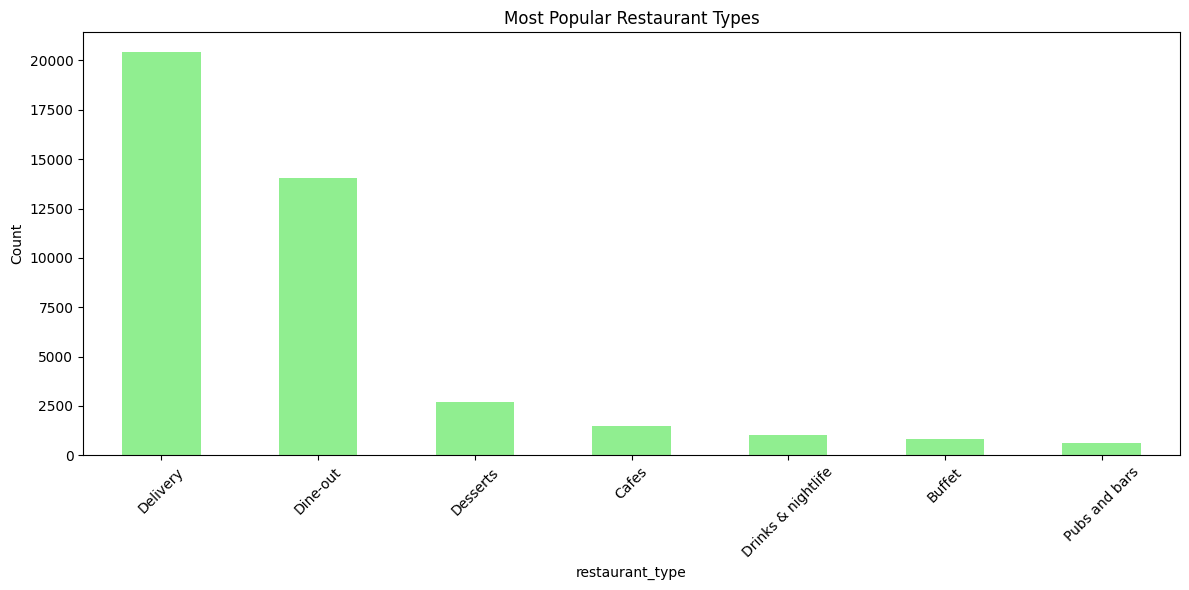

In [11]:
# 9. Most Popular Restaurant Types
plt.figure(figsize=(12,6))
df['restaurant_type'].value_counts().head(10).plot(kind='bar', color='lightgreen')
plt.title("Most Popular Restaurant Types")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1400x600 with 0 Axes>

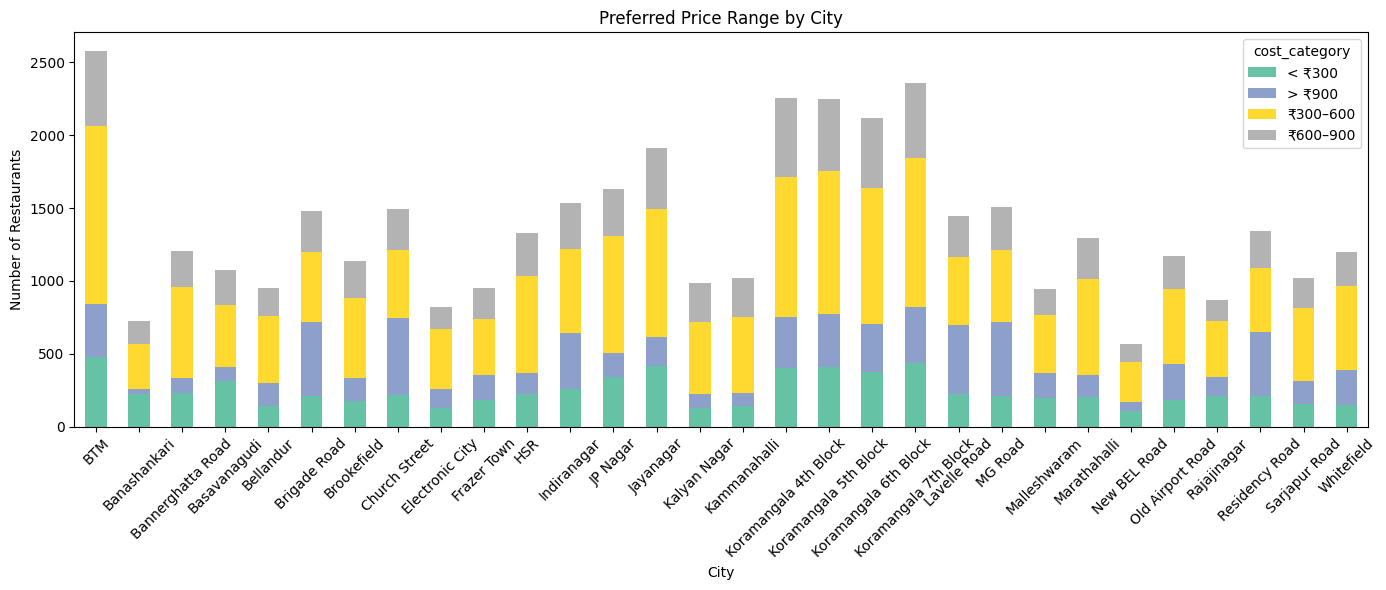

In [12]:
# 10. Preferred Price Range by City
plt.figure(figsize=(14,6))
cost_city = pd.crosstab(df['city'], df['cost_category'])
cost_city.plot(kind='bar', stacked=True, figsize=(14,6), colormap='Set2')
plt.title("Preferred Price Range by City")
plt.xlabel("City")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


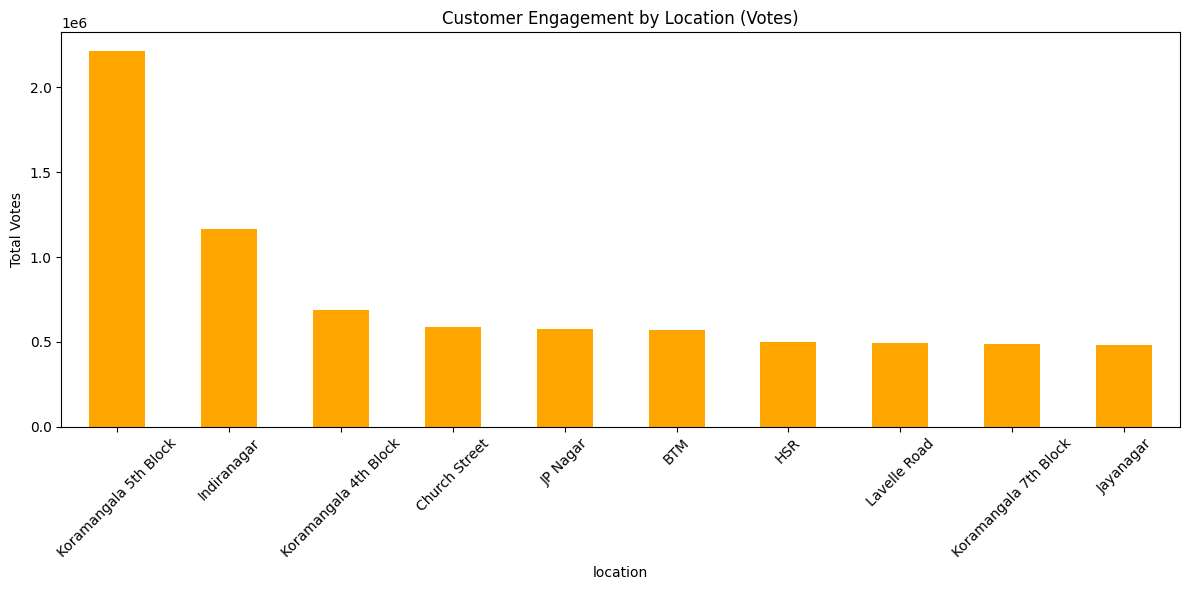

In [13]:
# 11. Customer Engagement by Location (Votes)
top_votes = df.groupby('location')['votes'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
top_votes.plot(kind='bar', color='orange')
plt.title("Customer Engagement by Location (Votes)")
plt.ylabel("Total Votes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


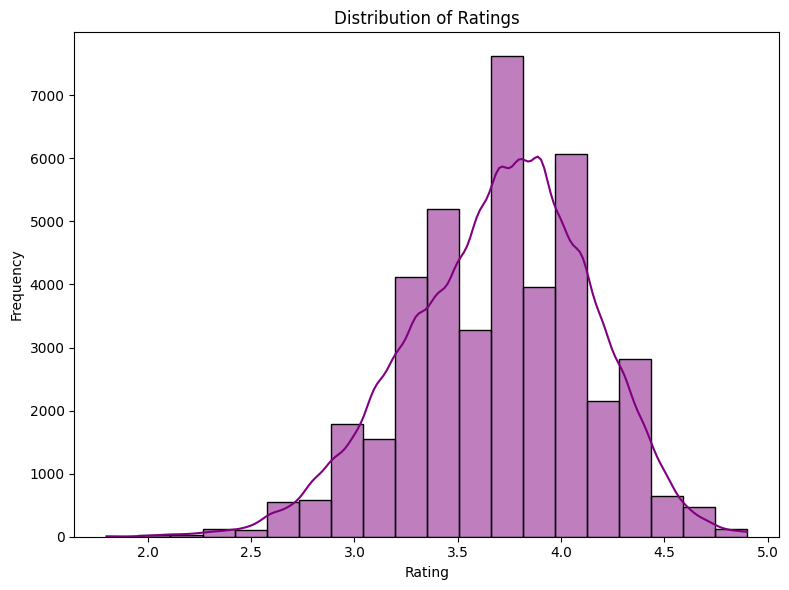

In [14]:
# 12. Distribution of Ratings
plt.figure(figsize=(8,6))
sns.histplot(df['rating'], bins=20, kde=True, color='purple')
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()
